In [1]:
import jieba

import tensorflow as tf
from tensorflow import keras

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()


In [2]:
import os
import tarfile  # 解压缩文件
import urllib.request  # 下载文件

import tensorflow as tf
import numpy as np


import re
import string
from random import randint

In [3]:
# 下载数据集
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath = "data/aclImdb_v1.tar.gz"

if not os.path.isfile(filepath):  # 如果该路径下没有文件就下载
    print("downloading...")
    result = urllib.request.urlretrieve(url, filepath)
    print("downloaded:", result)
else:
    print(filepath, "is existed!")

data/aclImdb_v1.tar.gz is existed!


In [4]:
# 解压文件
if not os.path.exists("data/aclImdb"):
    tfile = tarfile.open(filepath, "r:gz")
    print("extracting...")
    result = tfile.extractall("data/")
    print("extraction completed")
else:
    print("data/aclImdb is existed!")

data/aclImdb is existed!


In [5]:
def rm_tags(text):
    re_tag = re.compile(r"<[^>]+>")  # 剔除html标签
    return re_tag.sub("", text)

In [6]:
# 读取文件


def read_files(filetype):
    path = "data/aclImdb/"
    file_list = []

    # 读取正面评价的文件的路径，存到file_list列表里
    positive_path = path + filetype + "/pos/"
    # os.listdir(positive_path)返回指定目录中的文件和子目录的名称列表
    for f in os.listdir(positive_path):
        # print(positive_path + f)
        file_list += [positive_path + f]
    pos_files_num = len(file_list)

    # 读取负面评价的文件的路径，存到file_list列表里
    positive_path = path + filetype + "/neg/"
    # os.listdir(positive_path)返回指定目录中的文件和子目录的名称列表
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
    neg_files_num = len(file_list) - pos_files_num

    print("read", filetype, "files:", len(file_list))  # 文件个数
    print(pos_files_num, "pos file in", filetype, "files")
    print(neg_files_num, "neg file in", filetype, "files")

    # print(file_list)

    # 得到所有标签
    all_labels = [[1, 0]] * pos_files_num + [[0, 1]] * neg_files_num

    # 得到所有文本
    all_texts = []
    for fi in file_list:
        with open(fi, encoding="utf8") as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]

    # print(all_texts)
    # print(all_labels)
    return all_labels, all_texts

In [7]:
train_labels, train_texts = read_files("train")
test_labels, test_texts = read_files("test")

read train files: 25000
12500 pos file in train files
12500 neg file in train files
read test files: 25000
12500 pos file in test files
12500 neg file in test files


In [8]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [9]:
y_train[0]

array([1, 0])

In [10]:
print("测试数据，正面评价例子文本:", test_texts[0])
print("测试数据，正面评价例子标签:", test_labels[0])
print("测试数据，负面评价例子文本:", test_texts[12500])
print("测试数据，负面评价例子标签:", test_labels[12500])

测试数据，正面评价例子文本: I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.
测试数据，正面评价例子标签: [1, 0]
测试数据，负面评价例子文本: Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I

## 建立token字典

In [11]:
# 建立 token
token = keras.preprocessing.text.Tokenizer(num_words=4000)  # 词典的单词数为4000

# 建立token词典
token.fit_on_texts(train_texts)  # 按单词出现次数排序 取前4000个

In [12]:
# 将影评文字转化为数字列表（一条影评文字转化为一条数字列表）
train_sequences = token.texts_to_sequences(train_texts)
test_sequences = token.texts_to_sequences(test_texts)

In [13]:
train_texts[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [14]:
train_sequences[0]

[308,
 6,
 3,
 1068,
 208,
 8,
 2160,
 29,
 1,
 168,
 54,
 13,
 45,
 81,
 40,
 391,
 109,
 137,
 13,
 57,
 149,
 7,
 1,
 481,
 68,
 5,
 260,
 11,
 2000,
 6,
 72,
 2422,
 5,
 631,
 70,
 6,
 1,
 5,
 2001,
 1,
 1530,
 33,
 66,
 63,
 204,
 139,
 64,
 1229,
 1,
 4,
 1,
 222,
 899,
 28,
 3021,
 68,
 4,
 1,
 9,
 693,
 2,
 64,
 1530,
 50,
 9,
 215,
 1,
 386,
 7,
 59,
 3,
 1470,
 3710,
 798,
 5,
 3509,
 176,
 1,
 391,
 9,
 1235,
 29,
 308,
 3,
 352,
 343,
 2970,
 142,
 129,
 5,
 27,
 4,
 125,
 1470,
 2372,
 5,
 308,
 9,
 532,
 11,
 107,
 1466,
 4,
 57,
 554,
 100,
 11,
 308,
 6,
 226,
 47,
 3,
 2231,
 11,
 8,
 214]

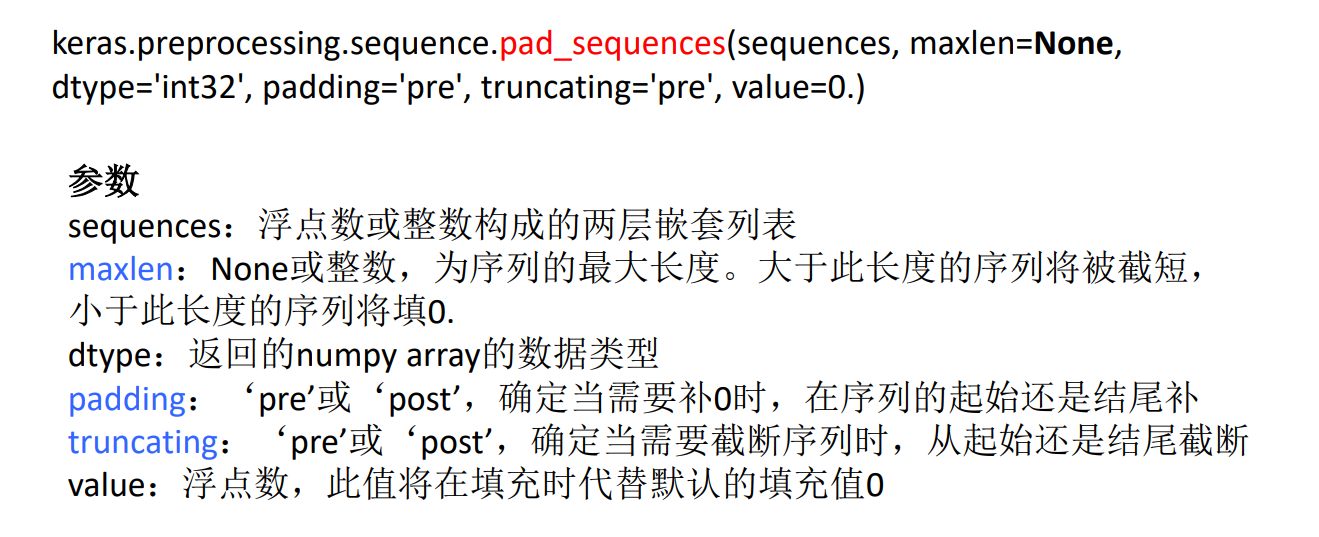

## 对“数字列表”截长补短 

In [15]:
x_train = keras.preprocessing.sequence.pad_sequences(
    train_sequences, maxlen=400, padding="post", truncating="post"
)
x_test = keras.preprocessing.sequence.pad_sequences(
    test_sequences, maxlen=400, padding="post", truncating="post"
)

In [16]:
x_train.shape

(25000, 400)

In [17]:
x_train[0]

array([ 308,    6,    3, 1068,  208,    8, 2160,   29,    1,  168,   54,
         13,   45,   81,   40,  391,  109,  137,   13,   57,  149,    7,
          1,  481,   68,    5,  260,   11, 2000,    6,   72, 2422,    5,
        631,   70,    6,    1,    5, 2001,    1, 1530,   33,   66,   63,
        204,  139,   64, 1229,    1,    4,    1,  222,  899,   28, 3021,
         68,    4,    1,    9,  693,    2,   64, 1530,   50,    9,  215,
          1,  386,    7,   59,    3, 1470, 3710,  798,    5, 3509,  176,
          1,  391,    9, 1235,   29,  308,    3,  352,  343, 2970,  142,
        129,    5,   27,    4,  125, 1470, 2372,    5,  308,    9,  532,
         11,  107, 1466,    4,   57,  554,  100,   11,  308,    6,  226,
         47,    3, 2231,   11,    8,  214,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## 建立模型

In [18]:
model = keras.models.Sequential()

model.add(
    keras.layers.Embedding(  # 将数字列表转换成词向量
        output_dim=32,  # 将每一个数字列表里面的数字都转换成32维向量，即一个单词用32维词向量表示
        input_dim=4000,  # 输入维数 字典词数4000
        input_length=400,  # 每个数字列表有400个数字  相当于用400个数字去表示一条评论
    )
)
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=8)))

model.add(
    keras.layers.Dense(
        units=32,  # 神经元节点数
        activation="relu",  # 激活函数
    )
)  # 隐藏层
model.add(keras.layers.Dropout(0.3))
model.add(
    keras.layers.Dense(
        units=2,
        activation="softmax",
    )
)

model.summary()  # 模型摘要

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 16)               2624      
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 131,234
Trainable params: 131,234
Non-trainable params: 0
__________________________________________________

In [19]:
# 配置
model.compile(
    optimizer="adam",  # 优化器
    loss="categorical_crossentropy",  # 损失函数
    metrics=["accuracy"],  # 评估
)

In [20]:
# 训练
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,  # 验证集占20%
    epochs=10,  # 训练10个周期W
    batch_size=128,  # 每一批次训练100项数据 一个周期大概训练20000/100=200批次
    verbose=1,
)

Epoch 1/10
157/157 [==============================] - 24s 128ms/step - loss: 0.6099 - accuracy: 0.6638 - val_loss: 0.6495 - val_accuracy: 0.7548
Epoch 2/10
157/157 [==============================] - 20s 128ms/step - loss: 0.3854 - accuracy: 0.8432 - val_loss: 0.5535 - val_accuracy: 0.7680
Epoch 3/10
157/157 [==============================] - 21s 134ms/step - loss: 0.3264 - accuracy: 0.8770 - val_loss: 0.7038 - val_accuracy: 0.7162
Epoch 4/10
157/157 [==============================] - 20s 125ms/step - loss: 0.2845 - accuracy: 0.8979 - val_loss: 0.4527 - val_accuracy: 0.8216
Epoch 5/10
157/157 [==============================] - 21s 131ms/step - loss: 0.2630 - accuracy: 0.9049 - val_loss: 0.4967 - val_accuracy: 0.8158
Epoch 6/10
157/157 [==============================] - 21s 131ms/step - loss: 0.2314 - accuracy: 0.9209 - val_loss: 0.5628 - val_accuracy: 0.7854
Epoch 7/10
157/157 [==============================] - 17s 110ms/step - loss: 0.2125 - accuracy: 0.9294 - val_loss: 1.0182 - val_ac

In [21]:
history.history

{'loss': [0.6098947525024414,
  0.38540735840797424,
  0.326389342546463,
  0.2844821810722351,
  0.26303672790527344,
  0.23136508464813232,
  0.21248582005500793,
  0.22065339982509613,
  0.18159376084804535,
  0.1743401437997818],
 'accuracy': [0.6638000011444092,
  0.8432000279426575,
  0.87704998254776,
  0.8979499936103821,
  0.9048500061035156,
  0.9209499955177307,
  0.9294000267982483,
  0.9224500060081482,
  0.9401000142097473,
  0.9420499801635742],
 'val_loss': [0.6495492458343506,
  0.5534525513648987,
  0.7038463950157166,
  0.4526810944080353,
  0.49672335386276245,
  0.5628275871276855,
  1.0181626081466675,
  0.5096620917320251,
  0.6978965997695923,
  0.5881510972976685],
 'val_accuracy': [0.754800021648407,
  0.7680000066757202,
  0.7161999940872192,
  0.8216000199317932,
  0.8158000111579895,
  0.7853999733924866,
  0.6435999870300293,
  0.8105999827384949,
  0.7494000196456909,
  0.7986000180244446]}

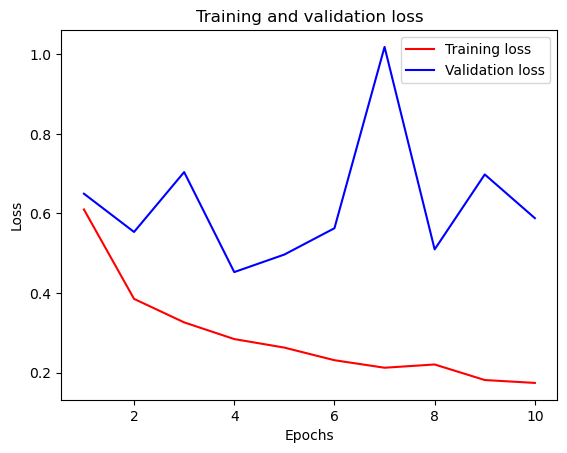

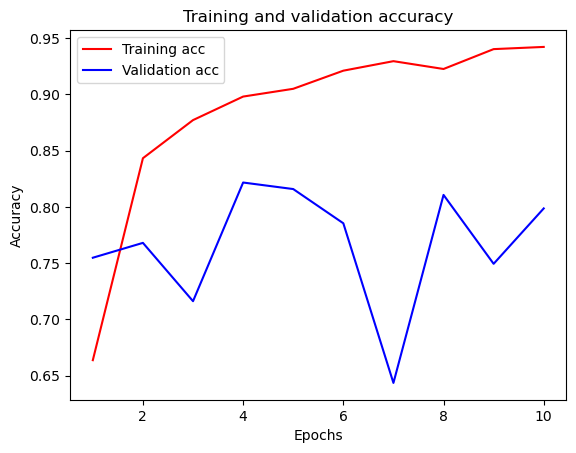

In [22]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

plt.clf()

plt.plot(epochs, acc, "r", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 评估

In [23]:
scores = model.evaluate(
    x_test,
    y_test,
    batch_size=100,  # 一批次使用100个样本 共训练25000/100=250批次
    verbose=1,
)
print(scores)


250/250 [==============================] - 7s 27ms/step - loss: 0.4608 - accuracy: 0.8370
[0.46080222725868225, 0.8370000123977661]


In [24]:
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])


Test loss: 0.46080222725868225
Test accuracy: 0.8370000123977661


## 预测

In [25]:
predict = model.predict(x_test)  # 预测的是类别，打印出来的值就是类别号


782/782 [==============================] - 13s 16ms/step


In [26]:
predict[0]

array([0.9888066 , 0.01119338], dtype=float32)

In [27]:
SentimentDict = {1: "正面的", 0: "负面的"}


def display_test_Sentiment(i):
    print("影评：", test_texts[i])
    print(
        "真实值：",
        SentimentDict[np.argmax(y_test[i])],
        "预测值：",
        SentimentDict[np.argmax(predict[i])],
    )


In [28]:
display_test_Sentiment(0)

影评： I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.
真实值： 负面的 预测值： 负面的


## 预测其他评论

In [29]:
# 封装函数


def predict_review(input_text):
    # 将影评文字转换为数字列表
    input_seq = token.texts_to_sequences([input_text])
    # 截断或者填充至100
    pad_input_seq = keras.preprocessing.sequence.pad_sequences(
        input_seq, maxlen=400, padding="post", truncating="post"
    )
    predict_result = model.predict(pad_input_seq)
    print(SentimentDict[np.argmax(predict_result)])


# 差评
# 将近300元买的杜比首映场，是真的不值。除了花里胡哨的特效外，一无是处，没有插科打诨和反高潮冷笑话，漫威就不会拍电影啦？花了十年塑造的人物形象性格在本作随意全部推翻，每个人所做的决策都不计后果，意气用事，幼稚且儿戏。巨作难逃烂尾，或许真的是个定律。
bad_text = """
Luke Skywalker goes in search of Jedi Master Yoda, to begin his Jedi training, meanwhile his friends and fellow band of rebels are pursued by The Empire's forces.
How on Earth was it possible to match, if not surpass Episode IV, it seems unfathomable, well that's exactly what they did with this remarkable movie, and whilst I personally rank the films on par with one another, I get why some favour this one. For me, the first came out of nowhere, whereas for this second one, expectations would have been incredibly high.
A superb storyline, breathtaking visuals, first class acting, and Yoda, what more could anyone possibly want or need from a movie, it's a bold claim, but I would genuinely say this is one of the greatest films of all time.
The sets are unbelievable, you can really tell that for those involved this was definitely a labour of love, everything was precise and on point.
It's worth a 10/10 for Yoda alone, I adore his and Luke's scenes together. The wonderful voice of Frank Oz adds a great deal, it really does help to make Yoda such an amazing, funny, smart and curious character.
Let's be honest, films don't get much better than this, it really is a masterpiece.
"""
predict_review(bad_text)


1/1 [==============================] - 0s 31ms/step
负面的
